In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
class AnimalClassifier(nn.Module):
  def __init__(self, num_classes):
    super(AnimalClassifier, self).__init__()
    self.model = nn.Sequential(
     nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1), nn.ReLU(), nn.MaxPool2d(2),
     nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1), nn.ReLU(), nn.MaxPool2d(2),
     nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), nn.ReLU(), nn.MaxPool2d(2),
     nn.Flatten(),
     nn.Linear(64 * 16 * 16, 256), nn.ReLU(),
     nn.Linear(256, num_classes)

    )

  def forward(self, x):
    x = self.model(x)
    return x

In [3]:
device = torch.device("cuda")
device

device(type='cuda')

In [4]:
num_classes = 10
model = AnimalClassifier(num_classes)
model.load_state_dict(torch.load("/content/animal_classifier_model.pth", map_location=device))
model.to(device)
model.eval()

AnimalClassifier(
  (model): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=16384, out_features=256, bias=True)
    (11): ReLU()
    (12): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [5]:
transform = transforms.Compose([
  transforms.Resize((128, 128)),
  transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
img_path = "/content/originalImage.jpg"
image = Image.open(img_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0).to(device)

In [7]:
features = []

def hook_fn(module, input, output):
  features.append(output.detach().cpu())

hook = model.model[0].register_forward_hook(hook_fn)

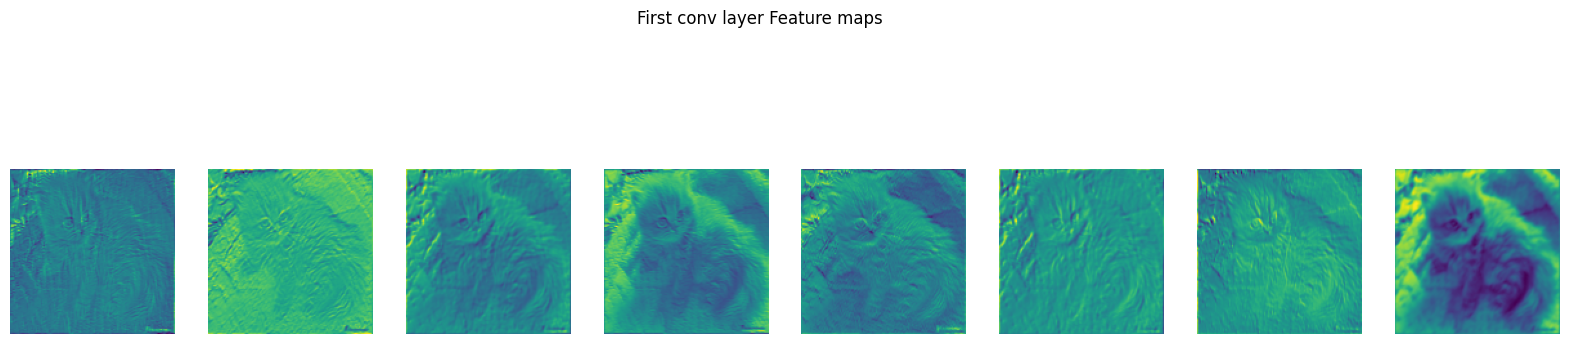

In [8]:
with torch.no_grad():
  output = model(input_tensor)

feature_map = features[0][0]

plt.figure(figsize=(20,5))
for i in range(8):
  plt.subplot(1,8, i + 1)
  plt.imshow(feature_map[i], cmap='viridis')
  plt.axis('off')
plt.suptitle("First conv layer Feature maps")
plt.show()

hook.remove()